<a href="https://colab.research.google.com/github/mdabushad/British-Airways-Web-Scrapping-and-Predicting-Customer-Buying-Behaviour.ipynb/blob/main/British_Airways_Predicting_Customer_Buying_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Web scraping British Airways Reviews

## Import Important Libraries


In [1]:
#Install Beautiful Soup
!pip install beautifulSoup4

#Import the required modules
import requests
from bs4 import BeautifulSoup
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 36
page_size = 100

reviews = []

for i in range(1, pages+1):
    print(f"Scraping page {i}")

    # Create URL to collect data from each page
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Send a GET request to the URL
    response = requests.get(url)

    # Create a Beautiful Soup object
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the appropriate HTML elements containing the reviews
    review_elements = soup.find_all('div', class_='text_content')

    # Extract the text content of the reviews and append them to the 'reviews' list
    for element in review_elements:
        reviews.append(element.get_text())

    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
# Create an empty DataFrame with the desired data type
df = pd.DataFrame(dtype=str)

# Add the 'reviews' list as a column named 'reviews' to the DataFrame
df["reviews"] = reviews

# Display the first few rows of the DataFrame
df.head()


,reviews
0,✅ Trip Verified | The worst experience in all ...
1,✅ Trip Verified | The worst experience in all...
2,✅ Trip Verified | Terrible delays. Had to reb...
3,✅ Trip Verified | A serious medical problem a...
4,✅ Trip Verified | I haven't flown British Air...


In [22]:
# Split the reviews based on "|", get the second part, and remove leading/trailing whitespaces
df["reviews"] = df["reviews"].apply(lambda x: x.split("|")[1].strip() if "|" in x else x.strip())

# Display the modified DataFrame
df.head()


,reviews,Cleaned_reviews,POS_tagged,Lemma,Subjectivity,Polarity,Analysis,VADER_Analysis,SWN_Analysis
0,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel first flight two ki...,0.619271,-0.132812,Negative,Negative,Negative
1,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel Bag destroy flight ...,0.518333,-0.440000,Negative,Negative,Negative
2,Terrible delays. Had to rebook our domestic tr...,Terrible delays Had to rebook our domestic tra...,"[(Terrible, a), (delays, n), (rebook, v), (dom...",Terrible delay rebook domestic travel passenge...,0.518182,-0.287879,Negative,Negative,Negative
3,A serious medical problem appeared while I was...,A serious medical problem appeared while I was...,"[(serious, a), (medical, a), (problem, n), (ap...",serious medical problem appear onboard inform ...,0.380952,-0.190476,Negative,Neutral,Negative
4,I haven't flown British Airways before and wil...,I haven t flown British Airways before and wil...,"[(flown, a), (British, a), (Airways, n), (neve...",flown British Airways never fly check process ...,0.551026,-0.280000,Negative,Negative,Negative


#Sentimental Analysis 


##[Rule-based approach](https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/)

###This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

###Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

##Data Preprocessing steps:
1. Cleaning the text
2. Tokenization
3. Enrichment-POS tagging
4. Stopwords removal
5. Obtaining the stem words





###Cleaning the text 
####Cleaning the text and removing all the numerical and special characters

In [23]:
# Import the regular expression module
import re

# Define a function to clean the reviews
def clean_reviews(review):
    # Remove all alphabetical characters from the review
    review = re.sub('[^A-Za-z]+', ' ', review)
    return review

# Apply the clean_reviews function to the "reviews" column and store the result in a new column "Cleaned_reviews"
df["Cleaned_reviews"] = df["reviews"].apply(clean_reviews)

# Display the modified DataFrame
df.head()


,reviews,Cleaned_reviews,POS_tagged,Lemma,Subjectivity,Polarity,Analysis,VADER_Analysis,SWN_Analysis
0,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel first flight two ki...,0.619271,-0.132812,Negative,Negative,Negative
1,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel Bag destroy flight ...,0.518333,-0.440000,Negative,Negative,Negative
2,Terrible delays. Had to rebook our domestic tr...,Terrible delays Had to rebook our domestic tra...,"[(Terrible, a), (delays, n), (rebook, v), (dom...",Terrible delay rebook domestic travel passenge...,0.518182,-0.287879,Negative,Negative,Negative
3,A serious medical problem appeared while I was...,A serious medical problem appeared while I was...,"[(serious, a), (medical, a), (problem, n), (ap...",serious medical problem appear onboard inform ...,0.380952,-0.190476,Negative,Neutral,Negative
4,I haven't flown British Airways before and wil...,I haven t flown British Airways before and wil...,"[(flown, a), (British, a), (Airways, n), (neve...",flown British Airways never fly check process ...,0.551026,-0.280000,Negative,Negative,Negative


###**Tokenization**
####Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

###**Enrichment-POS tagging**
####Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

###**Stopwords removal**
####Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

###**Obtaining the stem words**
####A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.
####The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


In [24]:
# Import the necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet


# Download the stopwords corpus
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
#Create a POS tagger dictionary 
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(review):
  tokens  = word_tokenize(review)
  tags = pos_tag(tokens)

  new_list = []
  for word, tag in tags:
    if word.lower() not in set(stopwords.words('english')):
      new_list.append(tuple([word, pos_dict.get(tag[0])]))
  return new_list

df["POS_tagged"] = df["Cleaned_reviews"].apply(token_stop_pos)



In [26]:
df.head()

,reviews,Cleaned_reviews,POS_tagged,Lemma,Subjectivity,Polarity,Analysis,VADER_Analysis,SWN_Analysis
0,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel first flight two ki...,0.619271,-0.132812,Negative,Negative,Negative
1,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel Bag destroy flight ...,0.518333,-0.440000,Negative,Negative,Negative
2,Terrible delays. Had to rebook our domestic tr...,Terrible delays Had to rebook our domestic tra...,"[(Terrible, a), (delays, n), (rebook, v), (dom...",Terrible delay rebook domestic travel passenge...,0.518182,-0.287879,Negative,Negative,Negative
3,A serious medical problem appeared while I was...,A serious medical problem appeared while I was...,"[(serious, a), (medical, a), (problem, n), (ap...",serious medical problem appear onboard inform ...,0.380952,-0.190476,Negative,Neutral,Negative
4,I haven't flown British Airways before and wil...,I haven t flown British Airways before and wil...,"[(flown, a), (British, a), (Airways, n), (neve...",flown British Airways never fly check process ...,0.551026,-0.280000,Negative,Negative,Negative


#####**Explanation**: token_stop_pos is the function that takes the text and performs tokenization, removes stopwords, and tags the words to their POS. We applied it to the ‘Cleaned_reviews’ column and created a new column for ‘POS_tagged’ data.

#####As mentioned earlier, to obtain the accurate Lemma the WordNetLemmatizer requires POS tags in the form of ‘n’, ‘a’, etc. But the POS tags obtained from pos_tag are in the form of ‘NN’, ‘ADJ’, etc.

#####To map pos_tag to wordnet tags,  we created a dictionary pos_dict. Any pos_tag that starts with J is mapped to wordnet.ADJ, any pos_tag that starts with R is mapped to wordnet.ADV, and so on.

#####Our tags of interest are Noun, Adjective, Adverb, Verb. Anything out of these four is mapped to None.

In [27]:
from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_tags):
    # Initialize the lemma result
    lemma_rew = ""

    # Iterate over each word-POS pair
    for word, pos in pos_tags:
        # Check if the POS tag is empty or None
        if not pos:
            # If no POS tag is available, consider the word itself as the lemma
            lemma = word
            lemma_rew += lemma + " "
        else:
            # Lemmatize the word based on its POS tag
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew += lemma + " "

    # Return the lemma result
    return lemma_rew.strip()

df['Lemma'] = df["POS_tagged"].apply(lemmatize)

In [28]:
df.head()

,reviews,Cleaned_reviews,POS_tagged,Lemma,Subjectivity,Polarity,Analysis,VADER_Analysis,SWN_Analysis
0,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel first flight two ki...,0.619271,-0.132812,Negative,Negative,Negative
1,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel Bag destroy flight ...,0.518333,-0.440000,Negative,Negative,Negative
2,Terrible delays. Had to rebook our domestic tr...,Terrible delays Had to rebook our domestic tra...,"[(Terrible, a), (delays, n), (rebook, v), (dom...",Terrible delay rebook domestic travel passenge...,0.518182,-0.287879,Negative,Negative,Negative
3,A serious medical problem appeared while I was...,A serious medical problem appeared while I was...,"[(serious, a), (medical, a), (problem, n), (ap...",serious medical problem appear onboard inform ...,0.380952,-0.190476,Negative,Neutral,Negative
4,I haven't flown British Airways before and wil...,I haven t flown British Airways before and wil...,"[(flown, a), (British, a), (Airways, n), (neve...",flown British Airways never fly check process ...,0.551026,-0.280000,Negative,Negative,Negative


In [29]:
#Now, take a minute to look at the ‘review’, ‘Lemma’ columns and observe how the text is processed.
df[["reviews", "Lemma"]]

,reviews,Lemma
0,The worst experience in all my years of travel...,bad experience year travel first flight two ki...
1,The worst experience in all my years of travel...,bad experience year travel Bag destroy flight ...
2,Terrible delays. Had to rebook our domestic tr...,Terrible delay rebook domestic travel passenge...
3,A serious medical problem appeared while I was...,serious medical problem appear onboard inform ...
4,I haven't flown British Airways before and wil...,flown British Airways never fly check process ...
...,...,...
3556,Flew LHR - VIE return operated by bmi but BA a...,Flew LHR VIE return operate bmi BA aircraft ai...
3557,LHR to HAM. Purser addresses all club passenge...,LHR HAM Purser address club passenger name boa...
3558,My son who had worked for British Airways urge...,son work British Airways urge fly British Airw...
3559,London City-New York JFK via Shannon on A318 b...,London City New York JFK via Shannon really ni...


###**Sentiment Analysis using TextBlob**
####TextBlob is a Python library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and more.

####The two measures that are used to analyze the sentiment are:

####Polarity - talks about how positive or negative the opinion is
####Subjectivity -talks about how subjective the opinion is

In [30]:
# Import the required TextBlob library
from textblob import TextBlob

# Function to calculate subjectivity
def getSubjectivity(review):
    # Create a TextBlob object with the review text
    blob = TextBlob(review)
    # Access the sentiment.subjectivity attribute to get the subjectivity score
    return blob.sentiment.subjectivity

# Function to calculate polarity
def getPolarity(review):
    # Create a TextBlob object with the review text
    blob = TextBlob(review)
    # Access the sentiment.polarity attribute to get the polarity score
    return blob.sentiment.polarity


In [31]:
# Calculate subjectivity for each review and store it in a new column "Subjectivity"
df["Subjectivity"] = df["Lemma"].apply(getSubjectivity)

# Calculate polarity for each review and store it in a new column "Polarity"
df["Polarity"] = df["Lemma"].apply(getPolarity)

# Display the updated dataframe
df.head()


,reviews,Cleaned_reviews,POS_tagged,Lemma,Subjectivity,Polarity,Analysis,VADER_Analysis,SWN_Analysis
0,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel first flight two ki...,0.619271,-0.132812,Negative,Negative,Negative
1,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel Bag destroy flight ...,0.518333,-0.440000,Negative,Negative,Negative
2,Terrible delays. Had to rebook our domestic tr...,Terrible delays Had to rebook our domestic tra...,"[(Terrible, a), (delays, n), (rebook, v), (dom...",Terrible delay rebook domestic travel passenge...,0.518182,-0.287879,Negative,Negative,Negative
3,A serious medical problem appeared while I was...,A serious medical problem appeared while I was...,"[(serious, a), (medical, a), (problem, n), (ap...",serious medical problem appear onboard inform ...,0.380952,-0.190476,Negative,Neutral,Negative
4,I haven't flown British Airways before and wil...,I haven t flown British Airways before and wil...,"[(flown, a), (British, a), (Airways, n), (neve...",flown British Airways never fly check process ...,0.551026,-0.280000,Negative,Negative,Negative


In [32]:
# Define a function to analyze sentiment based on polarity score
def analysis(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return "Neutral"
    else:
        return "Negative"

# Apply the analysis function to each polarity score in the "Polarity" column
df["Analysis"] = df["Polarity"].apply(analysis)

# Display the updated dataframe
df.head()


,reviews,Cleaned_reviews,POS_tagged,Lemma,Subjectivity,Polarity,Analysis,VADER_Analysis,SWN_Analysis
0,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel first flight two ki...,0.619271,-0.132812,Negative,Negative,Negative
1,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel Bag destroy flight ...,0.518333,-0.440000,Negative,Negative,Negative
2,Terrible delays. Had to rebook our domestic tr...,Terrible delays Had to rebook our domestic tra...,"[(Terrible, a), (delays, n), (rebook, v), (dom...",Terrible delay rebook domestic travel passenge...,0.518182,-0.287879,Negative,Negative,Negative
3,A serious medical problem appeared while I was...,A serious medical problem appeared while I was...,"[(serious, a), (medical, a), (problem, n), (ap...",serious medical problem appear onboard inform ...,0.380952,-0.190476,Negative,Neutral,Negative
4,I haven't flown British Airways before and wil...,I haven t flown British Airways before and wil...,"[(flown, a), (British, a), (Airways, n), (neve...",flown British Airways never fly check process ...,0.551026,-0.280000,Negative,Negative,Negative


In [33]:
# Calculate sentiment distribution
sentiment_counts_text_blob = df["Analysis"].value_counts()
sentiment_percentages = sentiment_counts_text_blob / len(df) * 100

# Display sentiment distribution
print("Sentiment Distribution:")
print(sentiment_counts_text_blob)
print("\nSentiment Percentages:")
print(sentiment_percentages)


Sentiment Distribution:
Positive    2706
Negative     832
Neutral       23
Name: Analysis, dtype: int64

Sentiment Percentages:
Positive    75.989890
Negative    23.364224
Neutral      0.645886
Name: Analysis, dtype: float64


###**Sentiment Analysis using VADER**
####VADER stands for Valence Aware Dictionary and Sentiment Reasoner. Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

####**compound**: Represents the overall sentiment intensity, ranging from -1 (extremely negative) to 1 (extremely positive).
####**pos**: The probability of the text being classified as positive.
####**neg**: The probability of the text being classified as negative.
####**neu**: The probability of the text being classified as neutral.

In [34]:
# Import the necessary libraries
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Function to perform sentiment analysis using VADER
def vadersentimentanalysis(review):
    # Create an instance of the SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    # Calculate sentiment scores for the review
    sentiment_scores = analyzer.polarity_scores(review)
    return sentiment_scores

# Function to classify sentiment based on compound score
def vader_analysis(scores):
    # Extract the compound score from the sentiment scores dictionary
    compound = scores['compound']
    # Classify sentiment based on the compound score
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis using VADER to the "Lemma" column in the DataFrame
df["VADER_Analysis"] = df["Lemma"].apply(vadersentimentanalysis).apply(vader_analysis)

# Display the updated DataFrame
df.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews,Cleaned_reviews,POS_tagged,Lemma,Subjectivity,Polarity,Analysis,VADER_Analysis,SWN_Analysis
0,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel first flight two ki...,0.619271,-0.132812,Negative,Negative,Negative
1,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel Bag destroy flight ...,0.518333,-0.440000,Negative,Negative,Negative
2,Terrible delays. Had to rebook our domestic tr...,Terrible delays Had to rebook our domestic tra...,"[(Terrible, a), (delays, n), (rebook, v), (dom...",Terrible delay rebook domestic travel passenge...,0.518182,-0.287879,Negative,Negative,Negative
3,A serious medical problem appeared while I was...,A serious medical problem appeared while I was...,"[(serious, a), (medical, a), (problem, n), (ap...",serious medical problem appear onboard inform ...,0.380952,-0.190476,Negative,Neutral,Negative
4,I haven't flown British Airways before and wil...,I haven t flown British Airways before and wil...,"[(flown, a), (British, a), (Airways, n), (neve...",flown British Airways never fly check process ...,0.551026,-0.280000,Negative,Negative,Negative


In [35]:
# Calculate sentiment distribution
sentiment_counts_vader = df["VADER_Analysis"].value_counts()
sentiment_percentages = sentiment_counts_vader / len(df) * 100

# Display sentiment distribution
print("Sentiment Distribution for Vader Analysis:")
print(sentiment_counts_vader)
print("\nSentiment Percentages for Vader Analysis:")
print(sentiment_percentages)


Sentiment Distribution for Vader Analysis:
Positive    2097
Negative     765
Neutral      699
Name: VADER_Analysis, dtype: int64

Sentiment Percentages for Vader Analysis:
Positive    58.887953
Negative    21.482730
Neutral     19.629318
Name: VADER_Analysis, dtype: float64


###**Sentiment Analysis using SentiWordNet**
####SentiWordNet uses the WordNet database. It is important to obtain the POS, lemma of each word. We will then use the lemma, POS to obtain the synonym sets(synsets). We then obtain the positive, negative, objective scores for all the possible synsets or the very first synset and label the text.

In [36]:

from nltk.corpus import sentiwordnet as swn

nltk.download('sentiwordnet')

def sentiwordnetanalysis(lemma):
    sentiment = 0
    tokens_count = 0
    
    for word in lemma.split():
        synsets = list(swn.senti_synsets(word))
        if synsets:
            # Take the first sense, the most common
            synset = synsets[0]
            sentiment += synset.pos_score() - synset.neg_score()
            tokens_count += 1
    
    if tokens_count == 0:
        return "No sentiment found"
    elif sentiment > 0:
        return "Positive"
    elif sentiment == 0:
        return "Neutral"
    else:
        return "Negative"

df['SWN_Analysis'] = df['Lemma'].apply(sentiwordnetanalysis)


[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [37]:
df.head()

,reviews,Cleaned_reviews,POS_tagged,Lemma,Subjectivity,Polarity,Analysis,VADER_Analysis,SWN_Analysis
0,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel first flight two ki...,0.619271,-0.132812,Negative,Negative,Negative
1,The worst experience in all my years of travel...,The worst experience in all my years of travel...,"[(worst, a), (experience, n), (years, n), (tra...",bad experience year travel Bag destroy flight ...,0.518333,-0.440000,Negative,Negative,Negative
2,Terrible delays. Had to rebook our domestic tr...,Terrible delays Had to rebook our domestic tra...,"[(Terrible, a), (delays, n), (rebook, v), (dom...",Terrible delay rebook domestic travel passenge...,0.518182,-0.287879,Negative,Negative,Negative
3,A serious medical problem appeared while I was...,A serious medical problem appeared while I was...,"[(serious, a), (medical, a), (problem, n), (ap...",serious medical problem appear onboard inform ...,0.380952,-0.190476,Negative,Neutral,Negative
4,I haven't flown British Airways before and wil...,I haven t flown British Airways before and wil...,"[(flown, a), (British, a), (Airways, n), (neve...",flown British Airways never fly check process ...,0.551026,-0.280000,Negative,Negative,Negative


In [39]:
# Calculate sentiment distribution
sentiment_counts_SentiWordNet = df["SWN_Analysis"].value_counts()
sentiment_percentages = sentiment_counts_SentiWordNet / len(df) * 100

# Display sentiment distribution
print("Sentiment Distribution for SentiWordNet Analysis:")
print(sentiment_counts_SentiWordNet)
print("\nSentiment Percentages for SentiWordNet Analysis:")
print(sentiment_percentages)


Sentiment Distribution for SentiWordNet Analysis:
Positive    2194
Negative    1281
Neutral       86
Name: SWN_Analysis, dtype: int64

Sentiment Percentages for SentiWordNet Analysis:
Positive    61.611907
Negative    35.973041
Neutral      2.415052
Name: SWN_Analysis, dtype: float64


##Data Visualization of TextBlob, VADER, and SentiWordNet Results

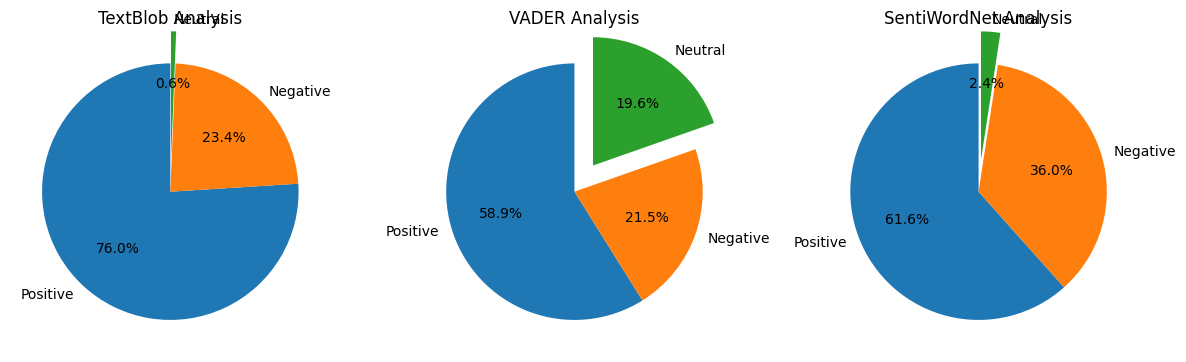

In [42]:
import matplotlib.pyplot as plt

# Set the figure size and create subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Subplot 1: TextBlob Analysis
ax[0].set_title("TextBlob Analysis")
ax[0].pie(sentiment_counts_text_blob.values, labels=sentiment_counts_text_blob.index, explode=(0, 0, 0.25), autopct='%1.1f%%', startangle=90, shadow=False)

# Subplot 2: VADER Analysis
ax[1].set_title("VADER Analysis")
ax[1].pie(sentiment_counts_vader.values, labels=sentiment_counts_vader.index, explode=(0, 0, 0.25), autopct='%1.1f%%', startangle=90, shadow=False)

# Subplot 3: SentiWordNet Analysis
ax[2].set_title("SentiWordNet Analysis")
ax[2].pie(sentiment_counts_SentiWordNet.values, labels=sentiment_counts_SentiWordNet.index, explode=(0, 0, 0.25), autopct='%1.1f%%', startangle=90, shadow=False)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


### **Wordcloud**
####A word cloud is a visual representation of text data where the size of each word corresponds to its frequency or importance in the given text. In a word cloud, words that appear more frequently in the text are typically displayed in a larger font size or with more prominence, making them visually prominent in the cloud.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
